In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
data = pd.read_csv(r'../fake_or_real_news.csv')

In [4]:
data = data.drop(['author'], axis = 1)

In [5]:
data = data.iloc[:, :3]
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data = data.dropna()

In [7]:
data.loc[data.label != 'REAL', 'label'] = 1
data.loc[data.label == 'REAL', 'label'] = 0

In [8]:
y = data.iloc[:, -1:].values
y = [i for sub in y for i in sub]

In [9]:
def transform(c):
    return c["title"] + " " + c["text"]
x = data.apply(transform, axis=1)

In [10]:
def lemma(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [11]:
x = x.apply(lemma)
x

0        smell hillary fear daniel greenfield shillman ...
1        watch exact moment paul ryan committed politic...
2        kerry go paris gesture sympathy u secretary st...
3        bernie supporter twitter erupt anger dnc tried...
4        battle new york primary matter primary day new...
                               ...                        
70795    tesla earnings smash expectation dramatic chan...
70796    rule ruler world really work following video m...
70797    fact check trump right clinton might cause ww ...
70798    caught tape isi destroys iraqi abrams anti tan...
70799    obamacare architect admits law working designe...
Length: 64733, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
tfidf = TfidfVectorizer(max_features=5000)
lr_model = LogisticRegression()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [15]:
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [16]:
def logReg(x, y):
  lr_model.fit(x_train, y_train)
  y_trainPred = lr_model.predict(x_train)
  y_testPred = lr_model.predict(x_test)
  print("Accuracy of training = ", accuracy_score(y_trainPred, y_train))
  print('Training accuracy\n')
  print(classification_report(y_train, y_trainPred))
  print("Accuracy of Testing = ", accuracy_score(y_testPred, y_test))
  print('Testing Results\n')
  clf_report = classification_report(y_test, y_testPred, output_dict=True)
  print(classification_report(y_test, y_testPred))
  return clf_report

In [17]:
clf = logReg(x_train, y_train)

Accuracy of training =  0.9714015370949678
Training accuracy

              precision    recall  f1-score   support

           0       0.96      0.43      0.60      2519
           1       0.97      1.00      0.99     49267

    accuracy                           0.97     51786
   macro avg       0.96      0.72      0.79     51786
weighted avg       0.97      0.97      0.97     51786

Accuracy of Testing =  0.968795860044798
Testing Results

              precision    recall  f1-score   support

           0       0.95      0.39      0.55       642
           1       0.97      1.00      0.98     12305

    accuracy                           0.97     12947
   macro avg       0.96      0.69      0.77     12947
weighted avg       0.97      0.97      0.96     12947



<AxesSubplot:>

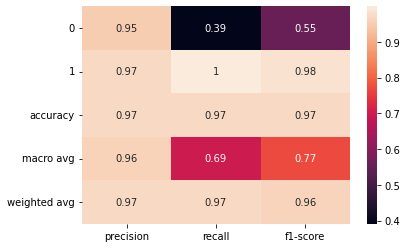

In [18]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True)